In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = pd.DataFrame(data)

In [4]:
df.columns = df.columns.str.replace(' ', '_')

In [5]:
print("\n\n", df)



      CustomerID  Gender  Age  Annual_Income_(k$)  Spending_Score_(1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


<AxesSubplot:xlabel='Gender', ylabel='count'>

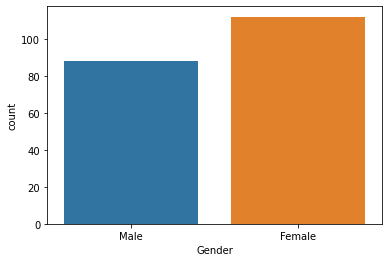

In [6]:
sns.countplot(x="Gender",data=data)

<AxesSubplot:ylabel='Spending_Score_(1-100)'>

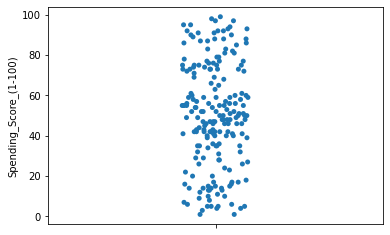

In [7]:
sns.stripplot (y=df['Spending_Score_(1-100)'])

<AxesSubplot:xlabel='Annual_Income_(k$)'>

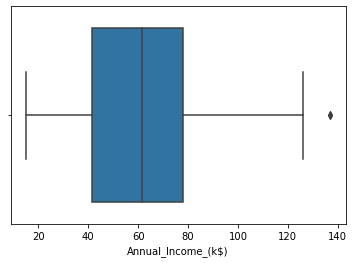

In [8]:
sns.boxplot(x =data['Annual_Income_(k$)'])

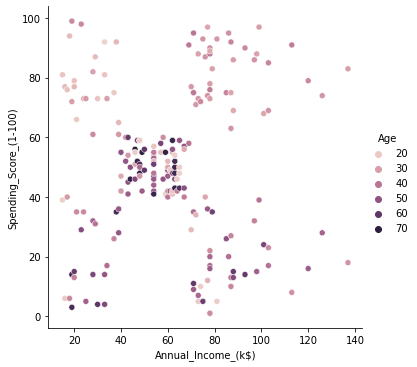

In [9]:
sns.relplot(x='Annual_Income_(k$)',y='Spending_Score_(1-100)',hue='Age',data=data)

<AxesSubplot:xlabel='Gender', ylabel='Spending_Score_(1-100)'>

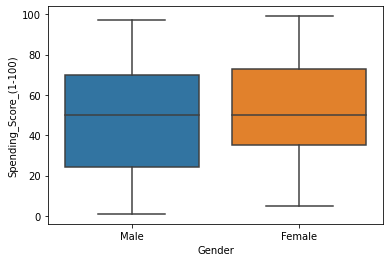

In [10]:
sns.boxplot(x='Gender',y='Spending_Score_(1-100)',data=data)

<AxesSubplot:xlabel='Gender', ylabel='Annual_Income_(k$)'>

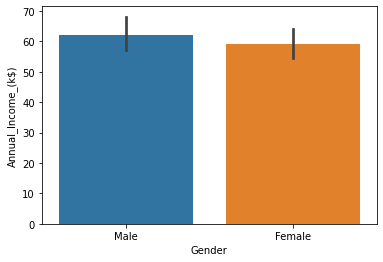

In [11]:
sns.barplot(x='Gender',y='Annual_Income_(k$)',data=data)

<AxesSubplot:xlabel='Gender', ylabel='Annual_Income_(k$)'>

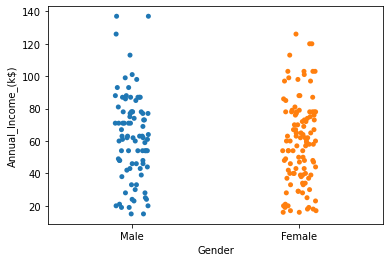

In [12]:
sns.stripplot(x="Gender", y="Annual_Income_(k$)", data=data)

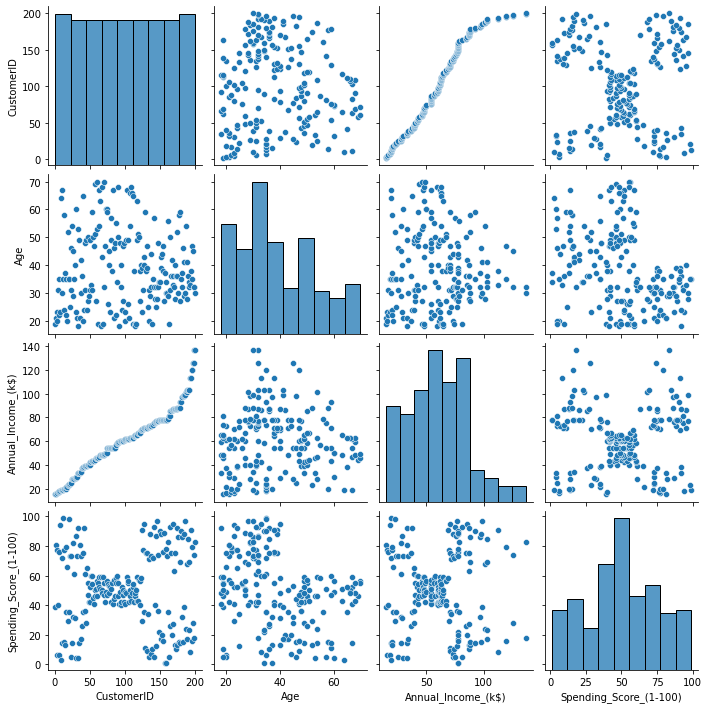

In [13]:
sns.pairplot(data)

In [14]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score_(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual_Income_(k$)        False
Spending_Score_(1-100)    False
dtype: bool

In [16]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual_Income_(k$)        0
Spending_Score_(1-100)    0
dtype: int64

In [17]:
outliers=data.quantile(q=(0.25,0.75))
outliers

,CustomerID,Age,Annual_Income_(k$),Spending_Score_(1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [18]:
Q1 = df['Annual_Income_(k$)'].quantile(0.25)
Q3 = df['Annual_Income_(k$)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_limit = Q1 - 1.5 * IQR
data.median(numeric_only=True)

CustomerID                100.5
Age                        36.0
Annual_Income_(k$)         61.5
Spending_Score_(1-100)     50.0
dtype: float64

<AxesSubplot:xlabel='Annual_Income_(k$)'>

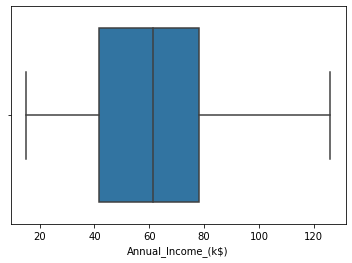

In [19]:
data['Annual_Income_(k$)'] = np.where(data['Annual_Income_(k$)'] < lower_limit, 7, data['Annual_Income_(k$)'])
sns.boxplot(x =data['Annual_Income_(k$)'],showfliers = False)

In [20]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
data.Gender = lab.fit_transform(data.Gender)

data.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [21]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Annual_Income_(k$)','Spending_Score_(1-100)']]
df[['Annual_Income_(k$)','Spending_Score_(1-100)']]=scale.fit_transform(X)
df[['Annual_Income_(k$)','Spending_Score_(1-100)']]

,Annual_Income_(k$),Spending_Score_(1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [22]:
df

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1,1,19,-1.738999,-0.434801
1,2,1,21,-1.738999,1.195704
2,3,0,20,-1.700830,-1.715913
3,4,0,23,-1.700830,1.040418
4,5,0,31,-1.662660,-0.395980
...,...,...,...,...,...
195,196,0,35,2.268791,1.118061
196,197,0,45,2.497807,-0.861839
197,198,1,32,2.497807,0.923953
198,199,1,32,2.917671,-1.250054


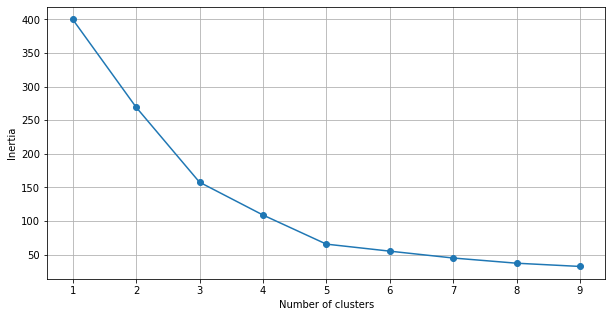

In [23]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

data=df
def optimise_k_means(data,max_k):
    means=[]
    inertias=[]
    
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    fig=plt.subplots(figsize=(10.,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
    
optimise_k_means(data[['Annual_Income_(k$)','Spending_Score_(1-100)']],10)

In [24]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
kmeans.fit_predict(df[['Annual_Income_(k$)','Spending_Score_(1-100)']])
df['kmeans_5']=kmeans.labels_
df

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100),kmeans_5
0,1,1,19,-1.738999,-0.434801,4
1,2,1,21,-1.738999,1.195704,1
2,3,0,20,-1.700830,-1.715913,4
3,4,0,23,-1.700830,1.040418,1
4,5,0,31,-1.662660,-0.395980,4
...,...,...,...,...,...,...
195,196,0,35,2.268791,1.118061,3
196,197,0,45,2.497807,-0.861839,0
197,198,1,32,2.497807,0.923953,3
198,199,1,32,2.917671,-1.250054,0


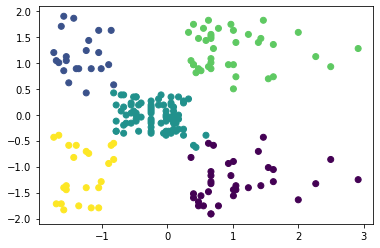

In [25]:
plt.scatter(x=df['Annual_Income_(k$)'],y=df['Spending_Score_(1-100)'],c=df['kmeans_5'])

In [26]:
kmeans.labels_

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [27]:
kmeans.cluster_centers_

array([[ 1.05500302, -1.28443907],
       [-1.32954532,  1.13217788],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536]])

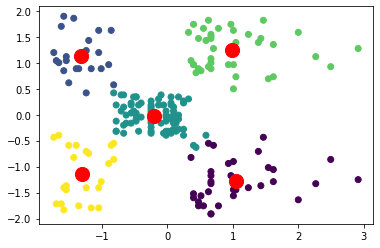

In [28]:
clusters=kmeans.cluster_centers_

plt.scatter(x=df['Annual_Income_(k$)'],y=df['Spending_Score_(1-100)'],c=df['kmeans_5'])
plt.scatter(clusters[0][0],clusters[0][1],marker='o',s=200,color='red')
plt.scatter(clusters[1][0],clusters[1][1],marker='o',s=200,color='red')
plt.scatter(clusters[2][0],clusters[2][1],marker='o',s=200,color='red')
plt.scatter(clusters[3][0],clusters[3][1],marker='o',s=200,color='red')
plt.scatter(clusters[4][0],clusters[4][1],marker='o',s=200,color='red')

In [29]:
independent = data.iloc[:,3:-1].values
dependent = data.iloc[:,5:].values

In [30]:
independent.shape

(200, 2)

In [31]:
dependent.shape

(200, 1)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(independent, dependent, random_state=0, train_size = .2)

In [33]:
X_test

array([[-1.43364376, -0.82301709],
       [ 1.00919971, -1.44416206],
       [ 0.09313341, -0.16305055],
       [ 0.01679455, -0.3183368 ],
       [ 1.04736914,  0.72984534],
       [ 1.42906343, -1.36651894],
       [-1.66266033,  1.00159627],
       [ 0.62750542, -0.55126616],
       [-1.54815205, -1.36651894],
       [ 0.66567484, -1.17241113],
       [-0.55574689,  0.18634349],
       [ 0.36031941,  1.04041783],
       [ 1.390894  , -0.7065524 ],
       [ 0.66567484, -1.32769738],
       [-0.25039146,  0.03105725],
       [-1.62449091,  1.70038436],
       [-1.05194947,  1.62274124],
       [ 0.39848884, -1.5994483 ],
       [-1.01378004,  0.88513158],
       [-0.25039146, -0.12422899],
       [ 1.42906343,  1.46745499],
       [ 0.62750542,  1.81684904],
       [-0.82293289,  0.5745591 ],
       [ 0.66567484,  0.88513158],
       [-0.55574689,  0.22516505],
       [ 0.32214998,  1.58391968],
       [ 1.23821628,  1.54509812],
       [ 1.46723286,  1.81684904],
       [ 0.32214998,

In [34]:
kmeans.predict(X_test)

array([4, 0, 2, 2, 3, 0, 1, 0, 4, 0, 2, 3, 0, 0, 2, 1, 1, 0, 1, 2, 3, 3,
       1, 3, 2, 3, 3, 3, 2, 4, 4, 2, 0, 2, 4, 3, 3, 4, 2, 2, 0, 2, 4, 2,
       0, 2, 4, 2, 2, 3, 2, 0, 0, 2, 3, 4, 4, 0, 4, 2, 3, 2, 3, 1, 3, 2,
       2, 3, 2, 2, 3, 2, 3, 2, 0, 2, 2, 4, 1, 3, 3, 2, 0, 3, 2, 2, 4, 2,
       0, 3, 2, 4, 0, 2, 0, 0, 3, 2, 2, 2, 0, 3, 2, 4, 2, 2, 2, 2, 3, 1,
       2, 2, 2, 2, 1, 3, 1, 0, 3, 4, 1, 2, 2, 2, 2, 2, 1, 2, 0, 0, 4, 2,
       2, 2, 3, 3, 0, 2, 3, 1, 2, 2, 1, 2, 2, 1, 2, 0, 4, 2, 2, 3, 1, 4,
       3, 2, 3, 0, 4, 4])

In [35]:
predicted=kmeans.predict(X_test)
expected = y_test

In [36]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(expected, predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error : ",RMSE)

Root Mean Square Error :  0.0
